In [1]:
import collections
from datetime import datetime
from IPython.display import clear_output, display, HTML
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from pathlib import Path
import pickle
import scipy
# import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
import sys
from scipy.ndimage import gaussian_filter1d
import imageio
from IPython.display import HTML
import pytoolsAL as ptAL
mpl.rcParams['pdf.fonttype'] = 42

import sys
sys.path.append("C:/Users/nadia/Documents/GitHub/steinmetzlab/wf + opto/figure-making")
from wfOpto import *

pytoolsAL: Modules missing.  Not loading image.  Message: cannot import name 'geometry' from 'skimage._shared' (c:\Users\nadia\anaconda3\envs\steinmetzlab\Lib\site-packages\skimage\_shared\__init__.py)
It seems that scikit-image has not been built correctly.

Your install of scikit-image appears to be broken.
Try re-installing the package following the instructions at:
https://scikit-image.org/docs/stable/user_guide/install.html
pytoolsAL: Modules missing.  Not loading plotting.  Message: No module named 'seaborn'


In [2]:
#work
plt.style.use(r'C:\Users\nadia\Documents\GitHub\steinmetzlab\ALpres.mplstyle')
#personal
# plt.style.use(r'C:\GitHub\steinmetzlab\ALpres.mplstyle')

In [57]:
data = wfOpto(Path(r'Y:\Subjects\AL_0033\2025-01-07\1'))

# mean image

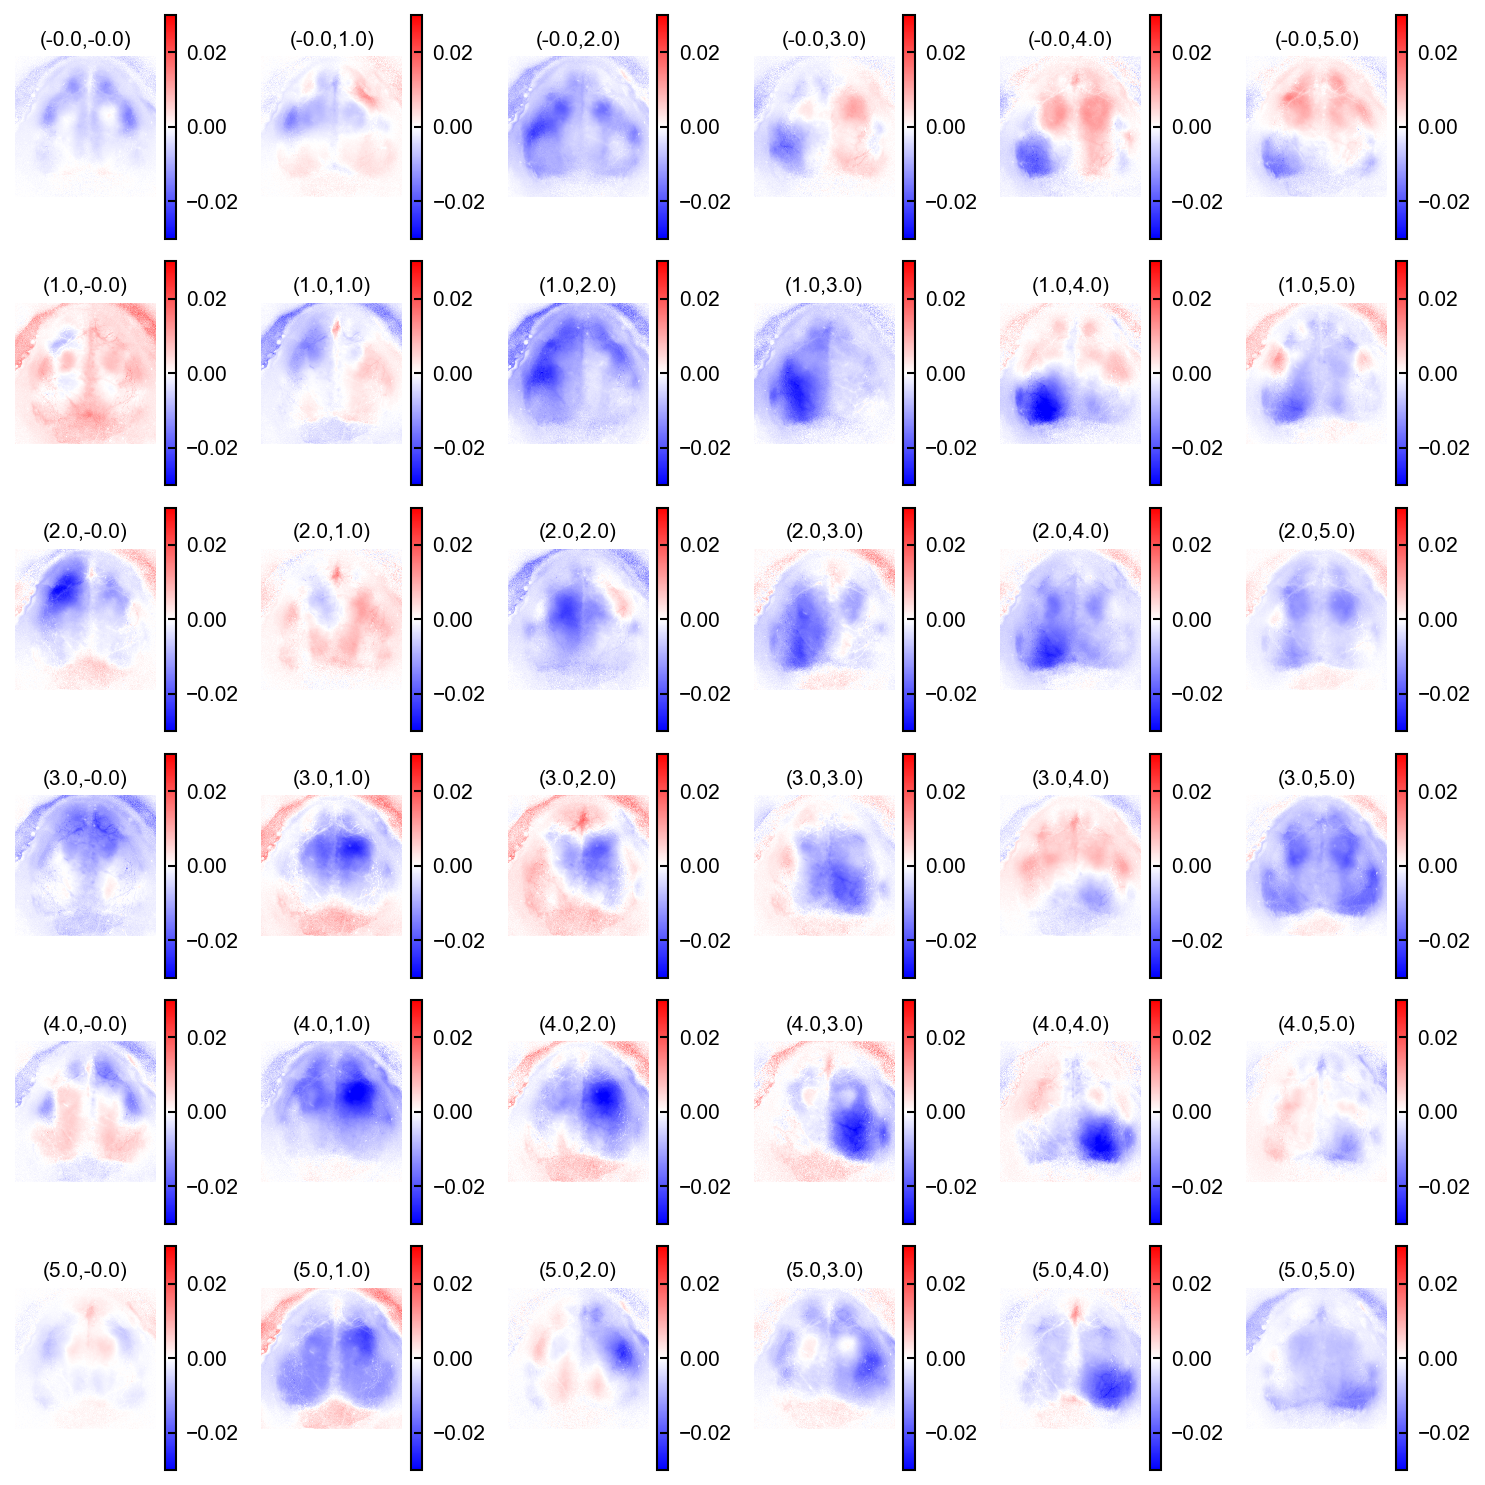

In [62]:
sparseIms=[]
start=0
end=0.2
n_samples = int((end-start)*35)
pow = np.argwhere(data.laserPowers==1.5).ravel()
for galvoX in np.unique(data.galvoX):
    for galvoY in np.unique(data.galvoY):
        galvoXTr = np.argwhere(data.galvoX == galvoX).ravel()
        galvoYTr = np.argwhere(data.galvoY == galvoY).ravel()
        loc = np.intersect1d(galvoXTr,galvoYTr)
        theseTrs = np.intersect1d(pow,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(start+on, end+on, n_samples) for on in onTimes]

        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        timemean = np.mean(mov,axis=1)
        mov_re = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560*560)
        mov_mean_dff = timemean/meanimg
        sparseIms.append(mov_mean_dff.reshape(560,560))

f = plt.figure(figsize=(10,10))
galvolenx = len(np.unique(data.galvoX))
galvoleny = len(np.unique(data.galvoY))
gs = mpl.gridspec.GridSpec(galvolenx,galvoleny)

clim = np.percentile(np.concatenate(sparseIms),[1,99])
for i,im in enumerate(sparseIms):
    ax = f.add_subplot(gs[i])
    im = ax.imshow(im,cmap='bwr',clim=clim,vmin=-0.03,vmax=0.03)
    plt.title(f'({np.unique(data.galvoX)[i//galvoleny]},{np.unique(data.galvoY)[i%galvoleny]})')
    f.colorbar(im,ax=ax)
    ax.axis('off')


# mean traces 

Generated (y, x) coordinates:
(100, 150)
(160, 150)
(220, 150)
(280, 150)
(340, 150)
(400, 150)
(100, 210)
(160, 210)
(220, 210)
(280, 210)
(340, 210)
(400, 210)
(100, 270)
(160, 270)
(220, 270)
(280, 270)
(340, 270)
(400, 270)
(100, 330)
(160, 330)
(220, 330)
(280, 330)
(340, 330)
(400, 330)
(100, 390)
(160, 390)
(220, 390)
(280, 390)
(340, 390)
(400, 390)
(100, 450)
(160, 450)
(220, 450)
(280, 450)
(340, 450)
(400, 450)


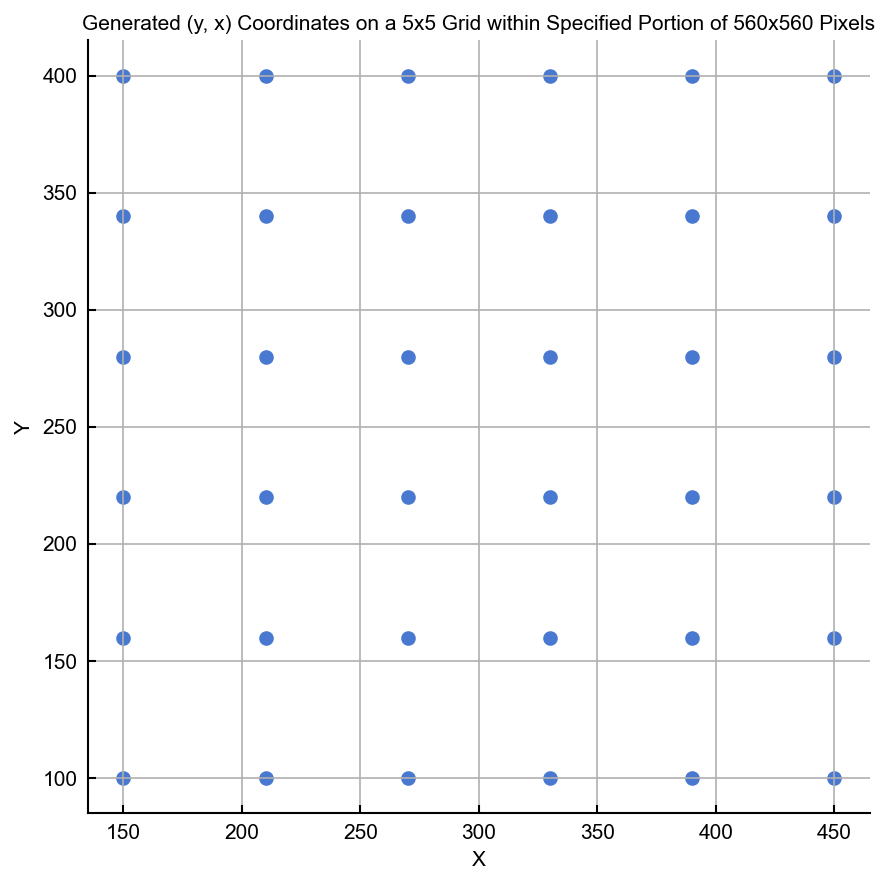

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size and pixel dimensions
grid_size = 6
pixel_dim = 560

# Define the portion of the grid to cover (start and end coordinates)
start_y, end_y = 100, 400  # Example values for y coordinates
start_x, end_x = 150, 450  # Example values for x coordinates

# Generate the grid coordinates
y_coords, x_coords = np.meshgrid(np.arange(grid_size), np.arange(grid_size))

# Scale the grid coordinates to fit within the specified portion of the pixel dimensions
y_coords_scaled = start_y + (y_coords / (grid_size - 1)) * (end_y - start_y)
x_coords_scaled = start_x + (x_coords / (grid_size - 1)) * (end_x - start_x)

# Flatten the coordinates to create a list of tuples
coordinates = list(zip(y_coords_scaled.flatten().astype(int), x_coords_scaled.flatten().astype(int)))

# Print the generated coordinates
print("Generated (y, x) coordinates:")
for coord in coordinates:
    print(coord)

# Optionally, plot the coordinates to visualize them
plt.figure(figsize=(6, 6))
plt.scatter(x_coords_scaled.flatten(), y_coords_scaled.flatten())
plt.title('Generated (y, x) Coordinates on a 5x5 Grid within Specified Portion of 560x560 Pixels')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

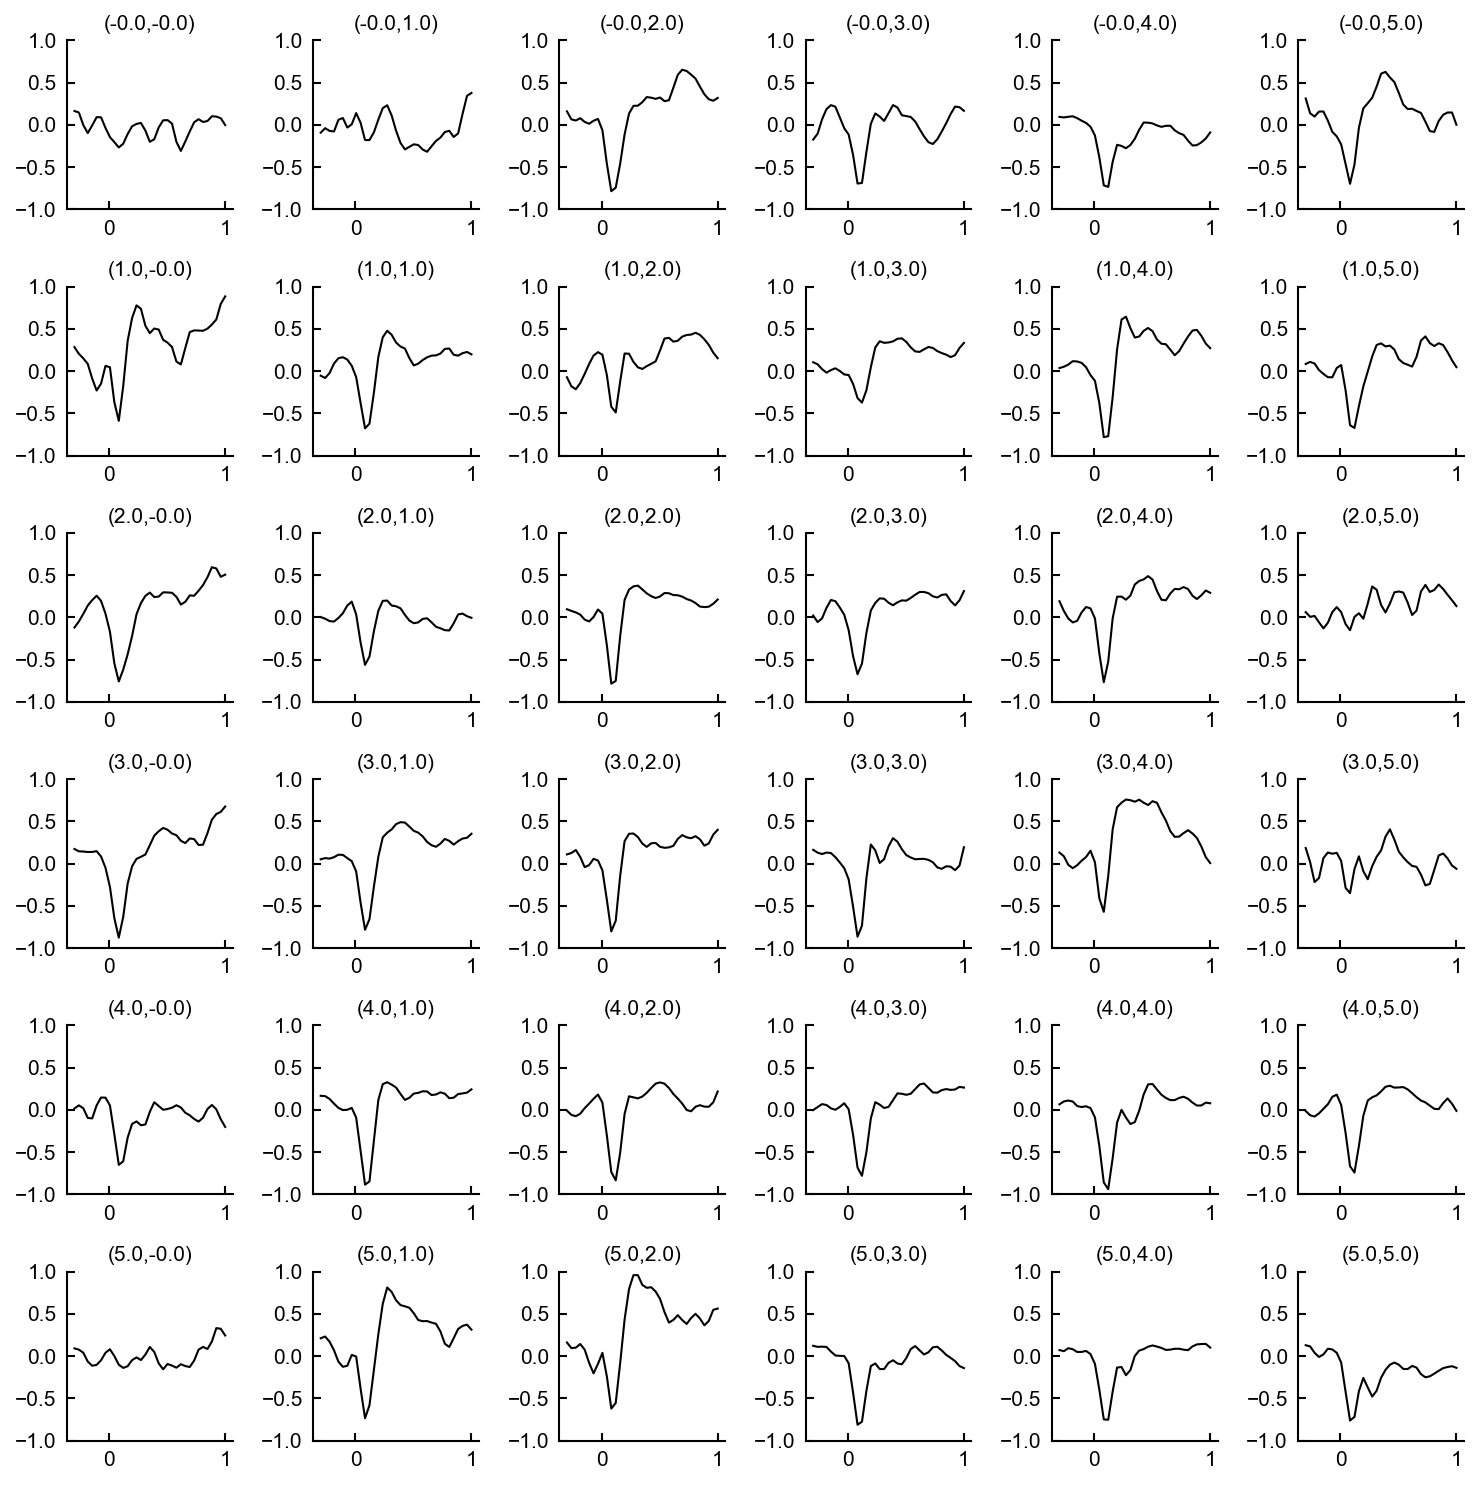

In [90]:
powers=np.unique(data.laserPowers)
galvoX=0;galvoY=0;x=150;y=415;width=1;anchor=(1,1)
ylim=[-0.01,0.008];start=-0.3;end=1;xlim=[-0.01,0.5]
n_samples = round(start*-1+end)*35
colors=plt.cm.inferno(np.linspace(.4,1,len(powers)))
pxLocs = []
sems=[]
timestamps = np.linspace(start, end, n_samples)
galvoXTr=np.argwhere(data.galvoX==galvoX).ravel()
galvoYTr=np.argwhere(data.galvoY==galvoY).ravel()
loc=np.intersect1d(galvoXTr,galvoYTr)

count=0
for galvoX in np.unique(data.galvoX):
    for galvoY in np.unique(data.galvoY):
        galvoXTr = np.argwhere(data.galvoX == galvoX).ravel()
        galvoYTr = np.argwhere(data.galvoY == galvoY).ravel()
        loc = np.intersect1d(galvoXTr,galvoYTr)
        theseTrs = np.intersect1d(pow,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(start+on, end+on, n_samples) for on in onTimes]

        coords = coordinates[count]
        pixel_ix = np.ravel_multi_index(coords, (560, 560))
        trial_activity=[]
        for trial in trs:
            wf = data.tToWFManual(trial)
            mov = data.svdSpat[pixel_ix] @ wf.T
            # mov_area_avg = np.mean(mov,axis=0) #avg over the 900 pixels
            mov_abs = mov + np.abs(np.min(mov))
            baseline_mean = np.mean(mov_abs[0:10])
            dff = (mov_abs - baseline_mean) / baseline_mean
            trial_activity.append(dff)
        pxLocs.append(np.mean(trial_activity,axis=0))
        count += 1

f = plt.figure(figsize=(10,10))
galvolenx = len(np.unique(data.galvoX))
galvoleny = len(np.unique(data.galvoY))
gs = mpl.gridspec.GridSpec(galvolenx,galvoleny)

clim = np.percentile(np.concatenate(sparseIms),[1,99])
for i,loc in enumerate(pxLocs):
    ax = f.add_subplot(gs[i])
    plt.plot(timestamps,loc,color='k')
    plt.ylim(-1,1)
    plt.title(f'({np.unique(data.galvoX)[i//galvoleny]},{np.unique(data.galvoY)[i%galvoleny]})')

# thesholding 

# std for mean im

- std fr the mean image for a particiular location
- plot in heatmap

In [15]:
sparseStds=[]
start=0.1
end=0.2
n_samples = int((end-start)*35)
pow = np.argwhere(data.laserPowers==1.5).ravel()
for galvoX in np.unique(data.galvoX):
    for galvoY in np.unique(data.galvoY):
        galvoXTr = np.argwhere(data.galvoX == galvoX).ravel()
        galvoYTr = np.argwhere(data.galvoY == galvoY).ravel()
        loc = np.intersect1d(galvoXTr,galvoYTr)
        theseTrs = np.intersect1d(pow,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(start+on, end+on, n_samples) for on in onTimes]

        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        timemean = np.mean(mov,axis=1)
        mov_re = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560*560)
        mov_mean_dff = timemean/meanimg
        meanim_final = mov_mean_dff.reshape(560,560)
        sparseStds.append(np.std(meanim_final))


-0.0,-0.0 done
-0.0,1.0 done
-0.0,2.0 done
-0.0,3.0 done
-0.0,4.0 done
-0.0,5.0 done
1.0,-0.0 done
1.0,1.0 done
1.0,2.0 done
1.0,3.0 done
1.0,4.0 done
1.0,5.0 done
2.0,-0.0 done
2.0,1.0 done
2.0,2.0 done
2.0,3.0 done
2.0,4.0 done
2.0,5.0 done
3.0,-0.0 done
3.0,1.0 done
3.0,2.0 done
3.0,3.0 done
3.0,4.0 done
3.0,5.0 done
4.0,-0.0 done
4.0,1.0 done
4.0,2.0 done
4.0,3.0 done
4.0,4.0 done
4.0,5.0 done
5.0,-0.0 done
5.0,1.0 done
5.0,2.0 done
5.0,3.0 done
5.0,4.0 done
5.0,5.0 done


Text(0.5, 1.0, 'STD per mean image per location')

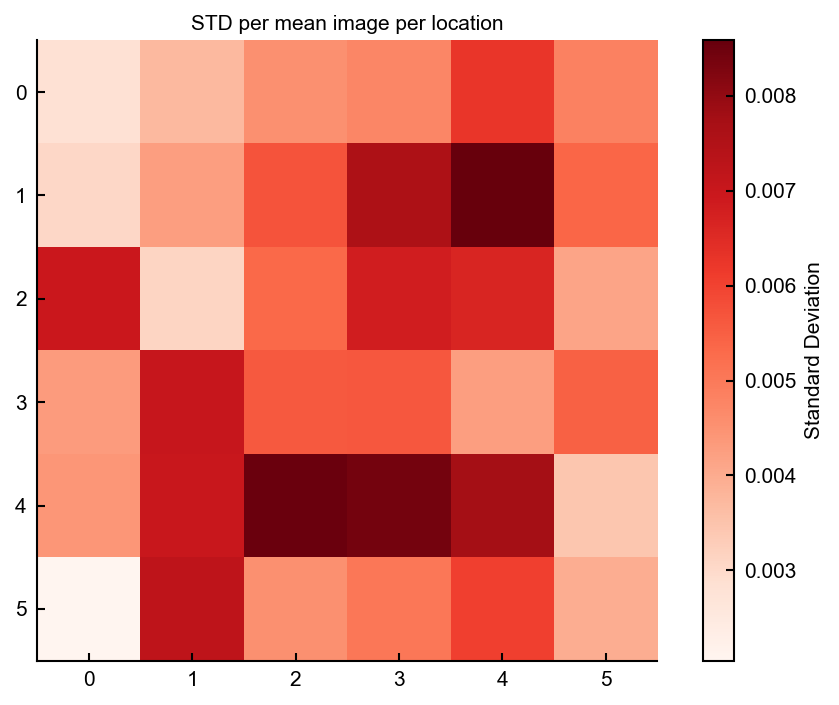

In [14]:
sparseStds = np.array(sparseStds).reshape(6,6)
plt.imshow(sparseStds, cmap='Reds')
plt.colorbar(label='Standard Deviation')
plt.title('STD per mean image per location')

# std for all trials 

In [16]:
sparseStdstrs=[]
start=0.1
end=0.2
n_samples = int((end-start)*35)
pow = np.argwhere(data.laserPowers==1.5).ravel()
for galvoX in np.unique(data.galvoX):
    for galvoY in np.unique(data.galvoY):
        galvoXTr = np.argwhere(data.galvoX == galvoX).ravel()
        galvoYTr = np.argwhere(data.galvoY == galvoY).ravel()
        loc = np.intersect1d(galvoXTr,galvoYTr)
        theseTrs = np.intersect1d(pow,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(start+on, end+on, n_samples) for on in onTimes]

        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        timemean = np.mean(mov,axis=1)
        mov_re = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560*560)
        mov_mean_dff = timemean/meanimg
        meanim_final = mov_mean_dff.reshape(560,560)
        sparseStds.append(np.std(meanim_final))

Text(0.5, 1.0, 'STD per mean image per location')

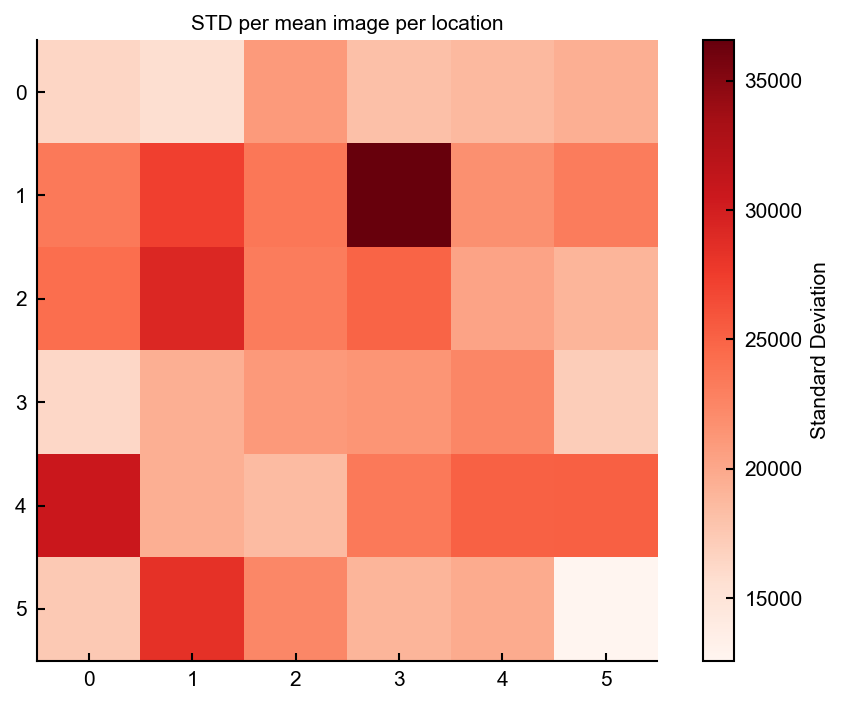

In [17]:
sparseStdstrs = np.array(sparseStdstrs).reshape(6,6)
plt.imshow(sparseStdstrs, cmap='Reds')
plt.colorbar(label='Standard Deviation')
plt.title('STD per mean image per location')